---
author: Freddy Villca Villegas
lang: es
format:
    html:
        embed-resources: true

echo: false
toc: true
---

# Análisis - Instituto de Idiomas GM

## Descripción general

Se realiza una exploracion y visualización de los datos que provienen de un archivo PDF de una institucion de enseñanza de idiomas mediante la modalidad virtual. Los datos muestran la calificación obtenida de los estudiantes aprobados de cada nivel, asi como tambien la decisión de seguir o no avanzando al siguiente curso o nivel. 

En este reporte se mostrara los hallazgos del análisis realizado. Tambien se proveera un descripcion de varias caracteristicas sobre el rendimiento de los estudiantes. Al final del reporte se dara algunas sugerencias para la institución.

In [1]:
import pdfplumber
import pandas as pd
import re

## Exploración y preparación de los datos

Extracción y lectura de los datos de las tablas contenidas en el pdf.

In [2]:
# Open the PDF file
with pdfplumber.open('GM_LISTA_MAYO_INTENSIVO.pdf') as pdf:
    for page in pdf.pages:
        tables = page.extract_table()
        print(tables)

[['Nº', 'Nombre del Estudiante', 'DEPARTAMENT\nO', 'TOTAL\nGENERAL', 'DOCENTE', 'NIVEL', 'ACTIVIDADES', 'CONTINUIDAD', 'MODALIDAD'], ['1', 'ALBANY MADELINE GARCIA MONASTERIOS', 'La Paz', '81', 'MARIAN', 'INTERMEDIO', 'COMPLETO -11', 'CONGELAR - TRABAJO', 'INTENSIVO'], ['2', 'ALICIA MAMANI QUISPE', 'La Paz', '75', 'MARIA', 'PRINCIPIANTE', '0- INCOMPLETO', 'CONGELAR - TRABAJO', 'INTENSIVO'], ['3', 'ALVARO WILCARANI CHAMBI', 'Oruro', '76', 'LOURDES', 'INTERMEDIO', '0- INCOMPLETO', 'NO SE PRESENTO', 'INTENSIVO'], ['4', 'AMEL RUDDY VASQUEZ SANJINES', 'La Paz', '95', 'ERIKA', 'PRINCIPIANTE', 'COMPLETO -14', 'CONTINUAR', 'INTENSIVO'], ['5', 'ANA NELY QUISPE QUISPE', 'La Paz', '104', 'NICOLAS', 'PRINCIPIANTE', 'COMPLETO - 11', 'CONTINUAR', 'INTENSIVO'], ['6', 'ANA RAQUEL QUELCA CADENA', 'Cochabamba', '97', 'HELEN', 'BASICO', '4- INCOMPLETO', 'CONTINUAR', 'INTENSIVO'], ['7', 'ANA ROXANA CABALLERO MARQUEZ', 'Sucre', '88', 'NICOLAS', 'PRINCIPIANTE', 'COMPLETO -12', 'CONTINUAR', 'INTENSIVO'], ['8'

In [3]:
#| output: False
# Extracción
pdf = 'GM_LISTA_MAYO_INTENSIVO.pdf'

def extract_table(path_pdf: str, page: int): 
    with pdfplumber.open(path_pdf) as pdf:
        pagina = pdf.pages[page]
        tabla = pagina.extract_table()
    return tabla

tabla_1 = extract_table(pdf, 0)
tabla_2 = extract_table(pdf, 1)
# Se convierte la tabla en un DataFrame
df_1 = pd.DataFrame(tabla_1[1:], columns=tabla_1[0])
df_2 = pd.DataFrame(tabla_2[0:], columns=tabla_1[0])

df_1.head()

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO


In [4]:
#| output: False
df_2.tail()

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
49,144,VERONICA CACERES SILVESTRE,Cochabamba,88,LOURDES,INTERMEDIO,COMPLETO,CONTINUAR,INTENSIVO
50,145,VICTOR ANTONIO ZURITA BORJA,Cochabamba,89,RUTH,BASICO,0- INCOMPLETA,CONGELAR - TRABAJO,INTENSIVO
51,146,VICTOR EDUARDO JIMÉNEZ MARTÍNEZ,Tarija,90,ERIKA,PRINCIPIANTE,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
52,147,YANIRA MILENCA ESTRADA BERRIOS,La Paz,87,RUTH,BASICO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
53,148,YOCELIN MIRIAM FLORES FLORES,La Paz,83,RUTH,BASICO,2- INCOMPLETO,CONTINUAR,INTENSIVO


A continuacion se tiene una muestra del conjunto de datos extraido:

In [5]:
df_total = pd.concat([df_1, df_2], ignore_index=True)
df_total.head()

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO


::: {.content-hidden}
## Limpieza de datos


In [6]:
#| output: False
df_total.shape

(148, 9)

In [7]:
df_total.columns

Index(['Nº', 'Nombre del Estudiante', 'DEPARTAMENT\nO', 'TOTAL\nGENERAL',
       'DOCENTE', 'NIVEL', 'ACTIVIDADES', 'CONTINUIDAD', 'MODALIDAD'],
      dtype='object')

In [8]:
# corrigiendo el nombre de las columnas
df_total.columns = (
    df_total.columns
    .str.lower()
    .str.replace('\n', '')
    .str.replace(' ', '_') 
)
df_total.columns

Index(['nº', 'nombre_del_estudiante', 'departamento', 'totalgeneral',
       'docente', 'nivel', 'actividades', 'continuidad', 'modalidad'],
      dtype='object')

In [9]:
df_total

,nº,nombre_del_estudiante,departamento,totalgeneral,docente,nivel,actividades,continuidad,modalidad
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO
...,...,...,...,...,...,...,...,...,...
143,144,VERONICA CACERES SILVESTRE,Cochabamba,88,LOURDES,INTERMEDIO,COMPLETO,CONTINUAR,INTENSIVO
144,145,VICTOR ANTONIO ZURITA BORJA,Cochabamba,89,RUTH,BASICO,0- INCOMPLETA,CONGELAR - TRABAJO,INTENSIVO
145,146,VICTOR EDUARDO JIMÉNEZ MARTÍNEZ,Tarija,90,ERIKA,PRINCIPIANTE,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
146,147,YANIRA MILENCA ESTRADA BERRIOS,La Paz,87,RUTH,BASICO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO


In [10]:
df_total.isnull().sum()

nº                       0
nombre_del_estudiante    0
departamento             0
totalgeneral             0
docente                  0
nivel                    0
actividades              0
continuidad              0
modalidad                0
dtype: int64

* No se tienen valores nulos o faltantes

In [11]:
df_total.duplicated().sum() # revision de valores duplicados

0

In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nº                     148 non-null    object
 1   nombre_del_estudiante  148 non-null    object
 2   departamento           148 non-null    object
 3   totalgeneral           148 non-null    object
 4   docente                148 non-null    object
 5   nivel                  148 non-null    object
 6   actividades            148 non-null    object
 7   continuidad            148 non-null    object
 8   modalidad              148 non-null    object
dtypes: object(9)
memory usage: 10.5+ KB


In [13]:
cols_categories = ['departamento', 'docente', 'nivel', 'actividades', 'continuidad', 'modalidad']

In [14]:
# revision de los valores categoricos presentes en cada columna, revision de espacios o caracteres
for col in cols_categories:
    print(col+":")
    print(df_total[col].unique())
    print("-"*70)

departamento:
['La Paz' 'Oruro' 'Cochabamba' 'Sucre' 'Santa Cruz' 'Potosí' 'Tarija'
 'Beni']
----------------------------------------------------------------------
docente:
['MARIAN' 'MARIA' 'LOURDES' 'ERIKA' 'NICOLAS' 'HELEN' 'RUTH']
----------------------------------------------------------------------
nivel:
['INTERMEDIO' 'PRINCIPIANTE' 'BASICO']
----------------------------------------------------------------------
actividades:
['COMPLETO -11' '0- INCOMPLETO' 'COMPLETO -14' 'COMPLETO - 11'
 '4- INCOMPLETO' 'COMPLETO -12' '' '1- INCOMPLETO' '8- INCOMPLETO'
 'COMPLETO' '3-INCOMPLETO' '6- INCOMPLETO' 'COMPLETO - 12' '2- INCOMPLETO'
 '7- INCOMPLETO' 'COMPLETO -10' 'COMPLETO -13' 'COMPLETO-11'
 '5- INCOMPLETO' '6-INCOMPLETO' 'COMPLETO -19' '2-INCOMPLETO'
 '1-INCOMPLETO' 'COMPLETO-12' 'COMPLETO-10' '8-INCOMPLETO' 'INCOMPLETO'
 '4-INCOMPLETO' '7- INCOMPLETO0' '7-INCOMPLETO' '5-INCOMPLETO' 'COMPLETAS'
 '3- INCOMPLETO' 'COMPLETO - 10' 'COMPLETO-14' '0- INCOMPLETA'
 '6- INCOMPLETA' '2- INCOM

In [15]:
# Verificación de nulos despues de la conversion a enteros
pd.to_numeric(df_total.totalgeneral, errors='coerce').isnull().sum() # no hay valores nulos en la columna de calificación

0

In [16]:
# Se filtran las cadenas para detectar palabras distintas de COMPLETO e INCOMPLETO para poder tratarlas.
for s in df_total.actividades.unique():
    if not re.search(r'\b(COMPLETO|INCOMPLETO)\b', s):
        print(s)


7- INCOMPLETO0
COMPLETAS
0- INCOMPLETA
6- INCOMPLETA
2- INCOMPLETA


In [17]:
def extract_num(actividad): 
    if 'COMPLETO' == actividad: # solamente 'completo' == 9
        return 9
    numeros = re.findall(r'\d+', actividad)
    return int(numeros[0]) if numeros else 0

# Funcion de limpieza y tratamiento del conjunto de datos
def tweak_df(df_total):
    return (
    df_total
    .assign(
        totalgeneral=pd.to_numeric(df_total.totalgeneral, errors='coerce'),
        actividades=lambda df: (df.actividades
                                .str.strip()
                                .str.replace('COMPLETAS', 'COMPLETO', regex=False)
                                .str.replace('INCOMPLETO0', 'INCOMPLETO', regex=False)
                                .str.replace('INCOMPLETA', 'INCOMPLETO', regex=False)
                                .replace('', 'SIN INFORMACION', regex=False)
                               )
    )
    .assign(
        estado_actividades=lambda df: df.actividades.apply(
            lambda x: 'INCOMPLETO' if 'INCOMPLETO' in x else 'COMPLETO'
        ),
        n_actividades=lambda df: df.actividades.apply(extract_num),
        continuidad=lambda df: (df.continuidad
                                .str.replace(r'\s*-\s*', ' - ', regex=True) # Se normaliza el uso del guion, para evitar repetir categorias
                                .replace({
                                    'POR DEFINIR': 'POR CONFIRMAR',
                                    'CONGELAR - HORARIOS': 'CONGELAR - HORARIO',
                                    'CONGELAR - ACADEMICO': 'CONGELAR - ESTUDIO'
                                })
                               ),
        id_estudiante=lambda df: range(1, len(df) + 1), # Anonimización de nombres por seguridad en varios casos
    )
    .astype({'totalgeneral': 'uint8',
             'n_actividades': 'uint8',
             'id_estudiante': 'uint8',
             **{col:'category' for col in ['departamento', 'docente', 'nivel',
               'continuidad', 'modalidad', 'estado_actividades']}
    })
    [['id_estudiante', 'departamento', 'totalgeneral',
    'docente', 'nivel', 'modalidad', 'estado_actividades', 
    'n_actividades', 'continuidad']]
       
    
)

:::

Se realizo una limpieza y transformacion de datos para los análisis posteriores.

- Tabla procesada

In [18]:
df_clean = tweak_df(df_total)
df_clean

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,11,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,INCOMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,14,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,11,CONTINUAR
...,...,...,...,...,...,...,...,...,...
143,144,Cochabamba,88,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,9,CONTINUAR
144,145,Cochabamba,89,RUTH,BASICO,INTENSIVO,INCOMPLETO,0,CONGELAR - TRABAJO
145,146,Tarija,90,ERIKA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,0,NO SE PRESENTO
146,147,La Paz,87,RUTH,BASICO,INTENSIVO,INCOMPLETO,0,NO SE PRESENTO


In [19]:
#| output: False
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id_estudiante       148 non-null    uint8   
 1   departamento        148 non-null    category
 2   totalgeneral        148 non-null    uint8   
 3   docente             148 non-null    category
 4   nivel               148 non-null    category
 5   modalidad           148 non-null    category
 6   estado_actividades  148 non-null    category
 7   n_actividades       148 non-null    uint8   
 8   continuidad         148 non-null    category
dtypes: category(6), uint8(3)
memory usage: 3.2 KB


## Descripción general y visualizaciones

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#| output: False
df_clean.head()

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,11,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,INCOMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,14,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,11,CONTINUAR


In [22]:
dep_count = (
    df_clean
    .departamento
    .value_counts()
    .reset_index()
    .rename(columns={'index':'departamento',
                    'departamento': 'cantidad'})
)

In [23]:
#| output: False
dep_count

,departamento,cantidad
0,La Paz,71
1,Cochabamba,28
2,Sucre,13
3,Santa Cruz,12
4,Potosí,9
5,Tarija,9
6,Oruro,5
7,Beni,1


In [24]:
sns.set_style("whitegrid")

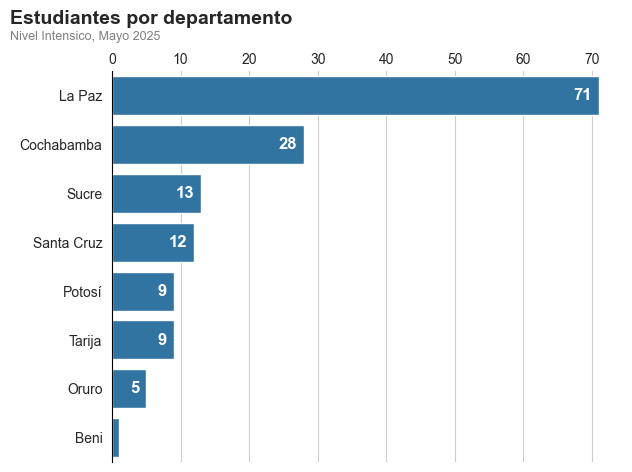

In [25]:
#| fig-align: center

sns.barplot(
    data=dep_count,
    x='cantidad',
    y='departamento',
    order=dep_count.sort_values('cantidad',ascending=False)['departamento'],
    color="#1f77b4"
)
# Titulo
plt.title("Estudiantes por departamento", fontsize=14, loc="left", fontweight="bold", x=-0.2, y=1.1)
plt.ylabel('')
plt.xlabel('')
# Subtítulo 
plt.text(
    x=-0.2, y=1.08,                            
    s="Nivel Intensico, Mayo 2025",
    transform=plt.gca().transAxes,
    fontsize=9,
    color="gray"
)

# Eje X arriba
plt.gca().xaxis.set_ticks_position('top')     # Se mueve los ticks arriba
plt.gca().xaxis.set_label_position('top')     
# Acortar las puntas de los ticks superiores
plt.tick_params(axis='x', which='both', top=True, length=0)

# Se agregan los textos dentro de las barras
for i, bar in enumerate(plt.gca().patches):
    ancho = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(
        x=ancho - 1,                      # Un poco antes del final de la barra
        y=y_pos,
        s=int(ancho),                     # Se muestra el valor como entero
        va='center',                     # Se alinea verticalmente al centro
        ha='right',                      # Se alinea a la derecha
        color='white',                   # Color del texto
        fontweight='bold',
        fontsize='12'
    )

plt.gca().spines['left'].set_color('black')  # Se cambia el color del eje y a negro



sns.despine(bottom=True)
plt.tight_layout()

El departamento de La Paz concentra la mayor cantidad de estudiantes de nivel intesivo (71), seguido por Cochabamba (28) y Sucre (13).
Por otro lado, solo se tiene un estudiante del departamento de Beni y ninguno de Pando.

In [26]:
#| output: False
dep_nivel = pd.crosstab(df_clean['departamento'], df_clean['nivel'])
# Se ordenan los departamentos (por suma total)
dep_nivel_sort = dep_nivel.loc[dep_nivel.sum(axis=1).sort_values().index, ['PRINCIPIANTE','BASICO','INTERMEDIO']]
dep_nivel_sort

nivel,PRINCIPIANTE,BASICO,INTERMEDIO
departamento,,,
Beni,0,1,0
Oruro,1,3,1
Potosí,5,3,1
Tarija,4,2,3
Santa Cruz,7,4,1
Sucre,9,3,1
Cochabamba,10,8,10
La Paz,41,21,9


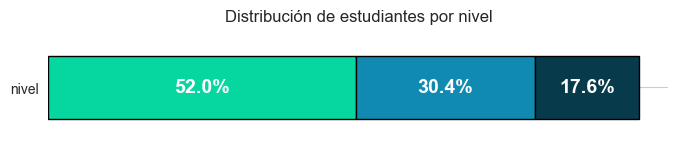

In [27]:
#| fig-align: center
colores = ['#06d6a0', '#118ab2', '#073b4c']
ax =df_clean.nivel.value_counts(normalize=True).mul(100).to_frame().T\
.plot(kind='barh',
      stacked=True,
      width=0.6,
      color=colores,
      figsize=(8, 1.5),
      legend=False,
      edgecolor='black',
      )

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', 
                 label_type='center', 
                 fontsize=14, 
                 color='white',
                 fontweight='bold',
                 )

ax.set_title('Distribución de estudiantes por nivel')
# Quitar marcas del eje x
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

#plt.tight_layout()
plt.show()

Los estudiantes del nivel principiante representan el 52 % del total de estudiantes de la modalidad intensivo. Con menor presencia los estudiantes de nivel intermedio representan menos del 20 % del total los alumnos.

In [28]:
# Gráfico
# # Your original data (assuming this is the output of dep_nivel_sort.sum())
# dep_nivel_sum = pd.Series([77, 45, 26], index=['PRINCIPIANTE', 'BASICO', 'INTERMEDIO'], name='count')

# # Calculate percentages
# total = dep_nivel_sum.sum()
# percentages = (dep_nivel_sum / total) * 100

# # Define colors for each category
# colors = ['skyblue', 'lightcoral', 'lightgreen']

# # Create the horizontal bar chart
# plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# # Plot horizontal bars and capture the bar objects to create the legend
# bars = plt.barh(percentages.index, percentages.values, color=colors)

# # Add title and labels
# plt.title('Distribución de Nivel por Porcentaje', fontsize=16)
# plt.xlabel('Porcentaje (%)', fontsize=12)
# plt.ylabel('Nivel', fontsize=12)

# # Set x-axis limits to 0-100 for percentages
# plt.xlim(0, 100)

# # Invert y-axis to have PRINCIPIANTE at the top (optional, but often preferred for order)
# plt.gca().invert_yaxis()

# # Add percentage labels on the bars
# for bar in bars:
#     width = bar.get_width()
#     plt.text(width + 1, bar.get_y() + bar.get_height()/2,
#              f'{width:.1f}%',
#              va='center', ha='left', fontsize=10)

# # Add a legend for the colors
# # We create proxy artists for the legend since barh doesn't automatically map to labels easily
# legend_labels = percentages.index.tolist()
# legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(colors))]
# plt.legend(legend_handles, legend_labels, title="Nivel")

# # Add grid for better readability
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# # Adjust layout to prevent labels from being cut off
# plt.tight_layout()

# # Show the plot
# plt.show()

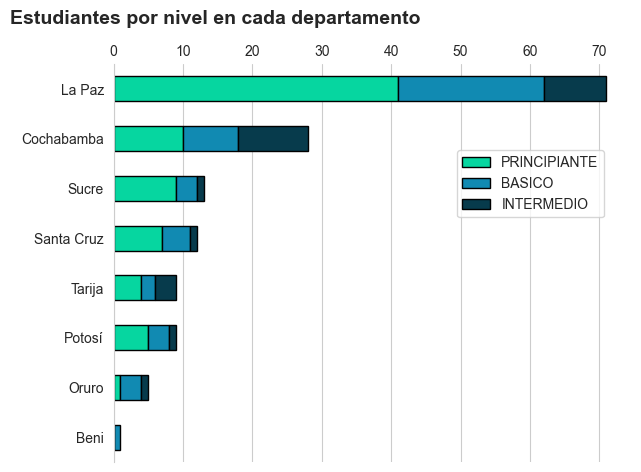

In [29]:
#| fig-align: center
colores = ['#06d6a0', '#118ab2', '#073b4c']

ax = dep_nivel_sort.plot(kind='barh',
                  stacked=True,
                  color=colores,
                  edgecolor='black',
                 )

plt.title("Estudiantes por nivel en cada departamento", fontsize=14, loc="left", fontweight="bold", x=-0.2, y=1.08)
plt.ylabel('')

# Se elimina la grilla del eje Y (líneas horizontales)
ax.grid(False, axis='y')
# Se elimina el título de la leyenda
ax.legend(
    title="",
    bbox_to_anchor=(0.65, 0.8),
    loc='upper left'
)
# Eje X arriba
plt.gca().xaxis.set_ticks_position('top')     # Se mueve los ticks arriba
plt.gca().xaxis.set_label_position('top')     
# Acortar las puntas de los ticks superiores
plt.tick_params(axis='x', which='both', top=True, length=0)

sns.despine(bottom=True)
plt.tight_layout()
plt.show()

In [30]:
tab_dep_nivel = dep_nivel.loc[dep_nivel.sum(axis=1).sort_values(ascending=False).index, ['PRINCIPIANTE','BASICO','INTERMEDIO']]
tab_dep_nivel.loc['Total'] = tab_dep_nivel.sum()
tab_dep_nivel

nivel,PRINCIPIANTE,BASICO,INTERMEDIO
departamento,,,
La Paz,41,21,9
Cochabamba,10,8,10
Sucre,9,3,1
Santa Cruz,7,4,1
Potosí,5,3,1
Tarija,4,2,3
Oruro,1,3,1
Beni,0,1,0
Total,77,45,26


El nivel principiante, es el nivel con mayor presencia en 6 departamentos de Bolivia.

In [31]:
#| output: False
df_clean.head()

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,11,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,INCOMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,14,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,11,CONTINUAR


::: {.column-page-inset}

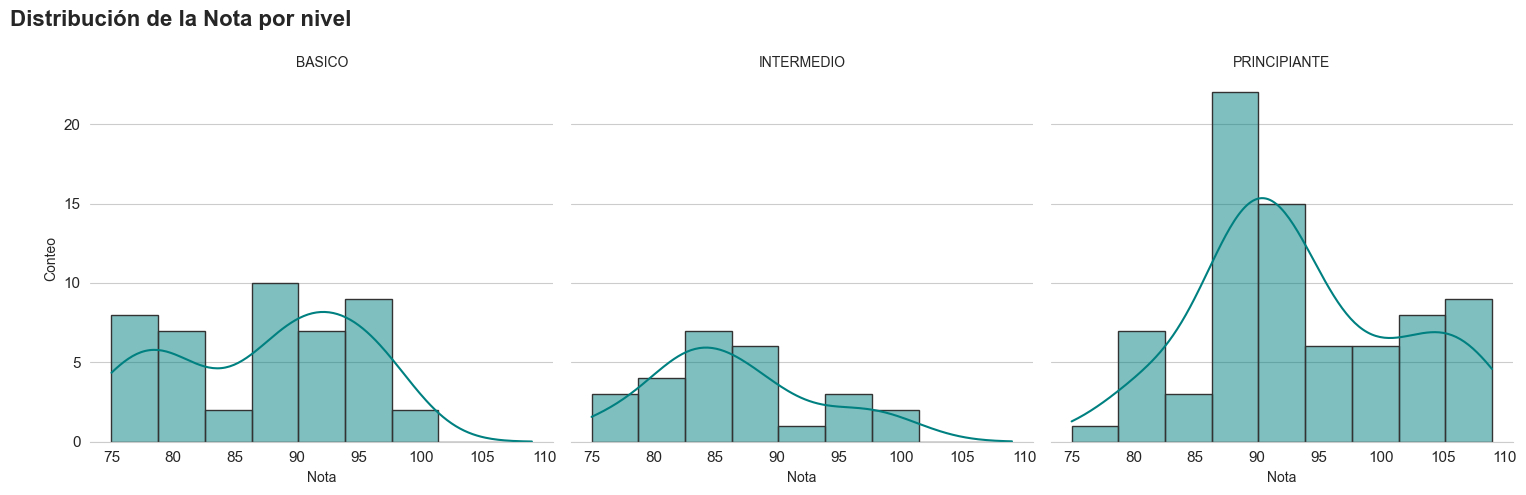

In [32]:
g = sns.displot(data=df_clean, x="totalgeneral",
            kde=True,
            col='nivel',
            color="teal",
            edgecolor='.2'
           )

# Se agrega el título principal
g.fig.suptitle("Distribución de la Nota por nivel", fontsize=16, fontweight="bold", x=0.1)

# Se ajusta el espacio para que no se sobreponga con los subgráficos
g.fig.subplots_adjust(top=0.85)
# Se accede a cada eje del grid y se desactiva la grilla del eje X
for ax in g.axes.flat:
    ax.grid(False, axis='x')
# Se borra el nombre del eje X en cada subplot
for ax in g.axes.flat:
    ax.set_xlabel('Nota')  # Se elimina el nombre del eje X
    ax.set_ylabel('Conteo')
    ax.tick_params(axis='both', which='major', labelsize=11)
    
g.set_titles("{col_name}")    
sns.despine(left=True)
plt.show()

:::

Dentro del nivel Principiante se tienen mayor cantidad de estudiantes con notas de 90 e incluso posee más estudiantes sobresalientes arriba de la nota de 100 con respecto a los otros niveles.

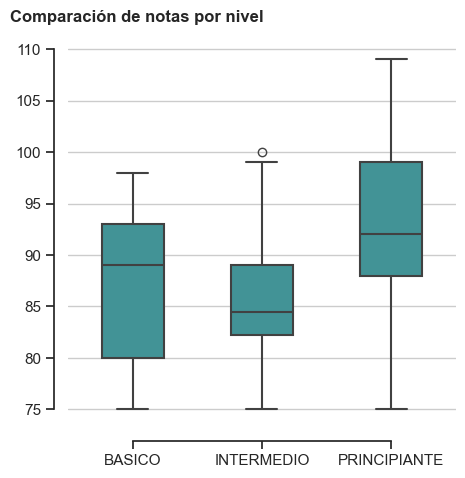

In [56]:
#| fig-align: center
plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    df_clean,
    x='nivel',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5,
    gap=.4
)
plt.title("Comparación de notas por nivel", fontsize=12, loc="left", fontweight="bold", x=-0.15, y=1.03)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

In [34]:
df_clean.groupby('nivel')['totalgeneral'].describe()

,count,mean,std,min,25%,50%,75%,max
nivel,,,,,,,,
BASICO,45.0,87.288889,7.560731,75.0,80.00,89.0,93.0,98.0
INTERMEDIO,26.0,86.461538,6.670717,75.0,82.25,84.5,89.0,100.0
PRINCIPIANTE,77.0,93.389610,8.163068,75.0,88.00,92.0,99.0,109.0


Los alumnos del nivel principiante muestran un mejor rendimiento con respecto a los demas niveles, tomando en cuenta las medianas y los promedios de cada uno.


* Un 25 % de estudiantes del nivel principiante posee notas por encima de 99.
* La nota mas alta obtenida es de 109.
* En general todos los niveles presentan buenos rendimientos en relacion a la calificacion de los estudiantes.

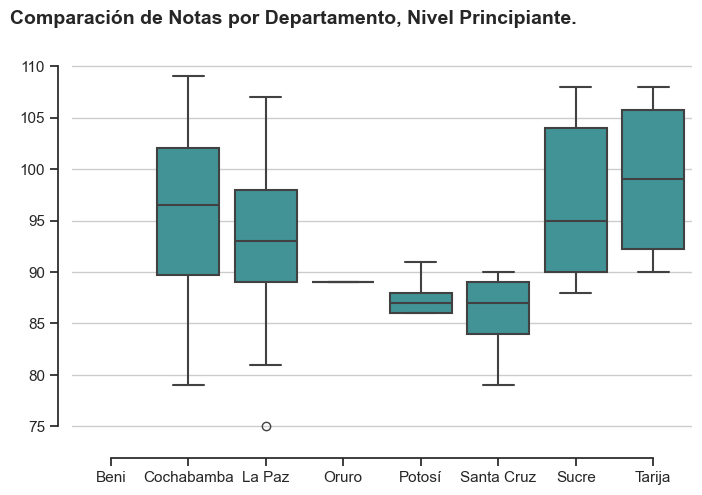

In [35]:
#| fig-align: center
sns.set_theme(style="ticks")
# Tamaño
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="PRINCIPIANTE"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5,
)
# titulo
plt.title("Comparación de Notas por Departamento, Nivel Principiante.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

In [36]:
# Función para resaltar valores altos
def resaltar_maximos(valores):
    es_max = valores == valores.max()
    return ['color: green; font-weight: bold' if v else '' for v in es_max]

def highlight_df(df):
    columnas_numericas = df.select_dtypes(include='number').columns
    # Se Aplica estilos solo a las columnas numéricas
    return df.style.apply(resaltar_maximos, axis=0, subset=columnas_numericas)


df_clean.query('nivel=="PRINCIPIANTE"')\
.groupby('departamento')['totalgeneral'].describe()\
.fillna(0)\
.reset_index()\
.sort_values('count', ascending=False)\
.pipe(highlight_df)

,departamento,count,mean,std,min,25%,50%,75%,max
2,La Paz,41.000000,93.341463,7.754385,75.000000,89.000000,93.000000,98.000000,107.000000
1,Cochabamba,10.000000,96.200000,9.589346,79.000000,89.750000,96.500000,102.000000,109.000000
6,Sucre,9.000000,97.444444,8.278151,88.000000,90.000000,95.000000,104.000000,108.000000
5,Santa Cruz,7.000000,86.000000,4.281744,79.000000,84.000000,87.000000,89.000000,90.000000
4,Potosí,5.000000,87.600000,2.073644,86.000000,86.000000,87.000000,88.000000,91.000000
7,Tarija,4.000000,99.000000,8.831761,90.000000,92.250000,99.000000,105.750000,108.000000
3,Oruro,1.000000,89.000000,0.000000,89.000000,89.000000,89.000000,89.000000,89.000000
0,Beni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Los estudiantes del departamento de Tarija tiene el mejor promedio de notas del nivel Principiante. Aunque tambien presenta menor cantidad de alumnos con diferencia del departamento de La Paz que tiene notas mas variadas.

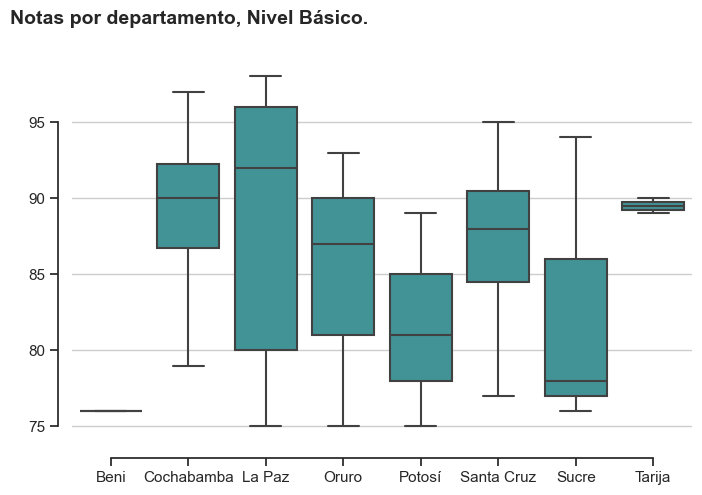

In [37]:
#| fig-align: center
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="BASICO"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5
    
)
# titulo
plt.title("Notas por departamento, Nivel Básico.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

In [38]:
df_clean.query('nivel=="BASICO"')\
.groupby('departamento')['totalgeneral'].describe()\
.fillna(0)\
.reset_index()\
.sort_values('count', ascending=False)

,departamento,count,mean,std,min,25%,50%,75%,max
2,La Paz,21.0,88.904762,7.841586,75.0,80.00,92.0,96.00,98.0
1,Cochabamba,8.0,88.750000,6.227818,79.0,86.75,90.0,92.25,97.0
5,Santa Cruz,4.0,87.000000,7.483315,77.0,84.50,88.0,90.50,95.0
3,Oruro,3.0,85.000000,9.165151,75.0,81.00,87.0,90.00,93.0
4,Potosí,3.0,81.666667,7.023769,75.0,78.00,81.0,85.00,89.0
6,Sucre,3.0,82.666667,9.865766,76.0,77.00,78.0,86.00,94.0
7,Tarija,2.0,89.500000,0.707107,89.0,89.25,89.5,89.75,90.0
0,Beni,1.0,76.000000,0.000000,76.0,76.00,76.0,76.00,76.0


Los estudiantes de Potosí y Sucre tiene promedios ligeramente mas bajos que los otros departamentos. Asimismo tambien cuenta con una reducida cantidad de estudiantes (3). Los demas departamentos no presentan grandes diferencias entre las notas obtenidas en el nivel Básico.

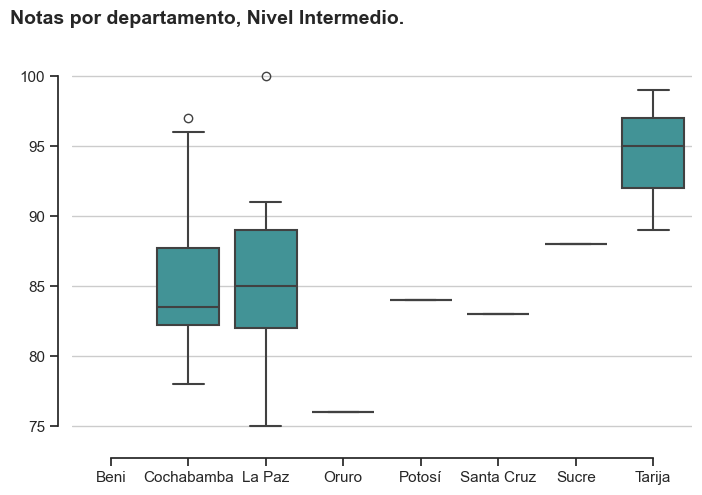

In [39]:
#| fig-align: center
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="INTERMEDIO"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5
    
)
# titulo y configuraciones
plt.title("Notas por departamento, Nivel Intermedio.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

In [40]:
df_clean.query('nivel=="INTERMEDIO"')\
.groupby('departamento')['totalgeneral'].describe()\
.fillna(0)\
.reset_index()\
.sort_values('count', ascending=False)\
.pipe(highlight_df)

,departamento,count,mean,std,min,25%,50%,75%,max
1,Cochabamba,10.000000,86.000000,6.182412,78.000000,82.250000,83.500000,87.750000,97.000000
2,La Paz,9.000000,86.000000,7.053368,75.000000,82.000000,85.000000,89.000000,100.000000
7,Tarija,3.000000,94.333333,5.033223,89.000000,92.000000,95.000000,97.000000,99.000000
3,Oruro,1.000000,76.000000,0.000000,76.000000,76.000000,76.000000,76.000000,76.000000
4,Potosí,1.000000,84.000000,0.000000,84.000000,84.000000,84.000000,84.000000,84.000000
5,Santa Cruz,1.000000,83.000000,0.000000,83.000000,83.000000,83.000000,83.000000,83.000000
6,Sucre,1.000000,88.000000,0.000000,88.000000,88.000000,88.000000,88.000000,88.000000
0,Beni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Los estudiantes de Tarija (3) presentan mejor rendimiento en el nivel Intermedio con respecto a los demas departamentos.
Los departamentod de Cochabamba y La Paz presentan rendimientos similares teniendo ambos un promedio de 86 puntos.

In [41]:
pd.crosstab(df_clean.docente, df_clean.nivel).loc[:,['PRINCIPIANTE', 'BASICO', 'INTERMEDIO']]

nivel,PRINCIPIANTE,BASICO,INTERMEDIO
docente,,,
ERIKA,26,0,0
HELEN,0,20,0
LOURDES,0,0,13
MARIA,30,0,0
MARIAN,0,0,13
NICOLAS,21,0,0
RUTH,0,25,0


Cada docente solamente dicto un curso en la modalidad intensivo.

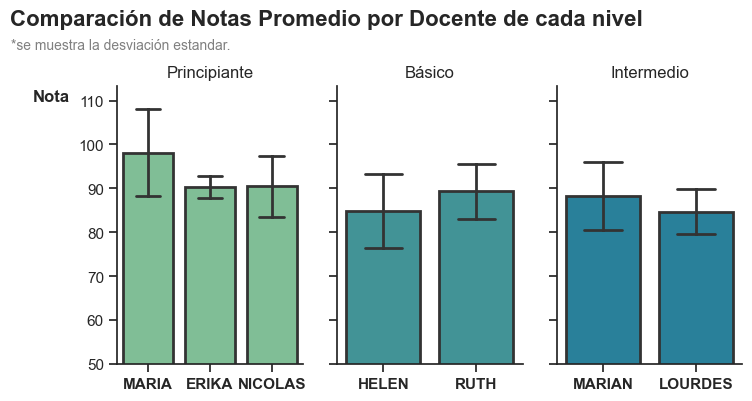

In [42]:

# Se crean 3 subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(7, 4), sharey=True)
colores = ['#76c893', '#34a0a4', '#168aad']
# Barplot 1: por docente
sns.barplot(
    df_clean.query('nivel=="PRINCIPIANTE"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar='sd',
    estimator='mean',
    capsize=.4,
    color=colores[0],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[0],
)
axes[0].set_title("Principiante")    
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# Barplot 2: por nivel
sns.barplot(
    df_clean.query('nivel=="BASICO"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar='sd',
    estimator='mean',
    capsize=.4,
    color=colores[1],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_title("Básico")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Barplot 3: por departamento
sns.barplot(
    df_clean.query('nivel=="INTERMEDIO"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar='sd',
    estimator='mean',
    capsize=.4,
    color=colores[2],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[2],
)
axes[2].set_title("Intermedio")
axes[2].set_xlabel("")
axes[2].set_ylabel("")


for ax in axes:
    # Se les pone en negrita las etiquetas del eje X
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
#Titulo
fig.suptitle("Comparación de Notas Promedio por Docente de cada nivel", fontsize=16, fontweight='bold', x=0.38, y=1)
fig.text(-0.07, 0.9, '*se muestra la desviación estandar.', fontsize=10, color='gray')


# Eje y, etiqueta
fig.text(-0.04, 0.77, 'Nota', fontsize=12, fontweight='bold')


sns.despine(top=True, right=True)
# Ajuste del diseño para evitar solapamiento
plt.tight_layout()
plt.ylim(50, None)
# Mostrar gráfico
plt.show()


In [43]:
df_clean.groupby(['nivel', 'docente'])['totalgeneral'].describe()

count       mean       std   min    25%    50%     75%  \
nivel        docente                                                           
BASICO       HELEN     20.0  84.800000  8.513766  75.0  77.75   80.5   92.50   
             RUTH      25.0  89.280000  6.174679  75.0  87.00   90.0   93.00   
INTERMEDIO   LOURDES   13.0  84.692308  5.056096  76.0  82.00   84.0   87.00   
             MARIAN    13.0  88.230769  7.769104  75.0  83.00   88.0   95.00   
PRINCIPIANTE ERIKA     26.0  90.346154  2.464830  87.0  88.25   90.0   92.00   
             MARIA     30.0  98.100000  9.907677  75.0  92.00  102.0  106.75   
             NICOLAS   21.0  90.428571  6.982632  79.0  86.00   90.0   95.00   

                        max  
nivel        docente         
BASICO       HELEN     98.0  
             RUTH      98.0  
INTERMEDIO   LOURDES   96.0  
             MARIAN   100.0  
PRINCIPIANTE ERIKA     95.0  
             MARIA    109.0  
             NICOLAS  104.0

A nivel general el curso de Maria tiene un promedio de notas superior al resto de cursos, con 98 puntos.


- El 75 % de los alumnos del curso de Maria del nivel principiante obtuvo un nota igual o superior a 92 puntos. Mientras que un 75 % de los alumnos del curso de Erika tiene un puntaje a los mas de 92 puntos.
- En el nivel Básico, el curso de Ruth posee un mejor promedio (89.3) y menor variacion en las notas con respecto al curso de Helen.
- En el nivel Intermedio, el curso de Marian presenta un mejor promedio (88) con respecto al curso de Lourdes.

In [44]:
#| output: False
df_clean.estado_actividades.value_counts()

INCOMPLETO    89
COMPLETO      59
Name: estado_actividades, dtype: int64

In [45]:
#| output: False
vals_pie = df_clean.estado_actividades.value_counts(normalize=True).mul(100)
vals_pie

INCOMPLETO    60.135135
COMPLETO      39.864865
Name: estado_actividades, dtype: float64

:::: {.columns}

::: {.column width="50%"}

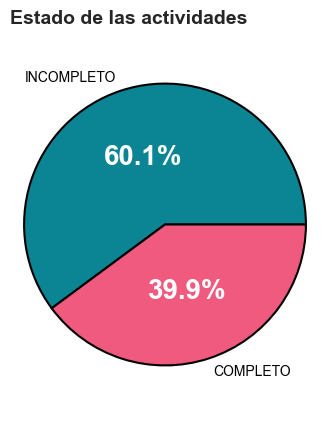

In [46]:
labels = vals_pie.index
sizes = vals_pie.values

colores = ['#0B8494','#F05A7E']

# Configuración de los bordes del pie
wedge_properties = {"edgecolor": "black", "linewidth": 1.5}

fig, ax = plt.subplots(figsize=(4, 5)) # Creamos una figura y un eje

# Creamos el pie chart
# pctdistance=0.7 para mostrar el porcentaje DENTRO del pie
wedges, texts, autotexts = ax.pie(sizes,
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  pctdistance=0.5, # Muestra el porcentaje DENTRO del pie
                                  colors=colores,
                                  wedgeprops=wedge_properties,
                                  textprops={'color': 'black', 'fontsize': 10})

# Quitar el nombre del eje Y (si aparece)
ax.yaxis.set_visible(False)

# Asegurar que el pie chart sea un círculo
ax.axis('equal')

for autotext in autotexts:
    autotext.set_color('white') # Color del texto de los porcentajes
    autotext.set_fontsize(20)
    autotext.set_weight('bold')

# Añadir un título
ax.set_title('Estado de las actividades', fontsize=14, loc='left', fontweight='bold')

plt.show()

:::

::: {.column width="50%"}

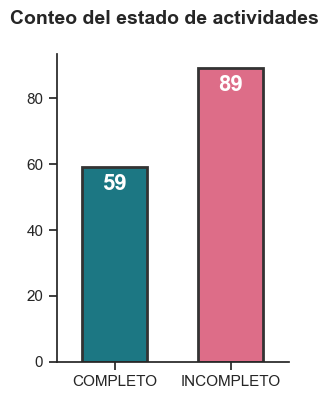

In [47]:
plt.figure(figsize=(3, 4))
colors=['#0B8494','#F05A7E']

ax=sns.countplot(
    df_clean,
    x='estado_actividades',
    hue='estado_actividades',
    linewidth=2,
    edgecolor=".2",
    palette=colors,
    gap=.3,
    
)

# Se agregan los números justo debajo del límite superior de la barra
for p in ax.patches:
    altura = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = altura - 2  # Se coloca ligeramente por debajo del tope de la barra
    ax.text(
        x, y, f'{int(altura)}',
        ha='center', va='top',
        color='white', fontweight='bold', fontsize=16
    )
plt.title("Conteo del estado de actividades", fontsize=14,loc="left", fontweight="bold", x=-0.2, y=1.07 )
sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

:::

::::

* El 60 % de los estudiantes no completo sus actividades y tienen riesgo de quedar inhabilitados.

* 89 estudiantes tienen riesgo de quedar inhabilitados.

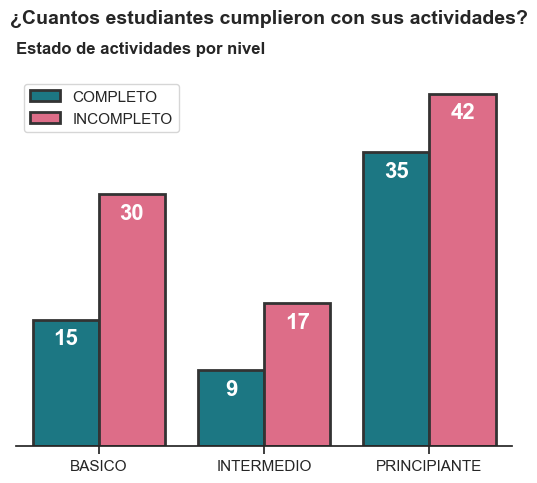

In [48]:
#| fig-align: center
ax=sns.countplot(
    df_clean,
    x='nivel',
    hue='estado_actividades',
    palette=colors,
    linewidth=2,
    edgecolor=".2",
)

# Agregar etiquetas justo debajo del borde superior
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:  # Para evitar errores si alguna barra es cero
        x = p.get_x() + p.get_width() / 2
        y = altura - 1  # Se ajusta el valor vertical
        ax.text(
            x, y, f'{int(altura)}',
            ha='center', va='top',
            color='white', fontweight='bold', fontsize=16
        )

plt.suptitle("¿Cuantos estudiantes cumplieron con sus actividades?", fontsize=14, fontweight='bold', x=0.52,y=1.02)
plt.title("Estado de actividades por nivel ", fontsize=12,loc="left", fontweight="bold", x=-0.0, y=1.04 )

plt.legend(title="")
sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('')

ax.spines['left'].set_visible(False)   # Quita la línea del eje Y (vertical izquierda)
ax.tick_params(axis='y', left=False)   # Quita las marcas (ticks) del eje Y
ax.set_yticklabels([]) 
plt.show()

Se puede observar que una mayoria de estudiantes en cada nivel no completaron sus actividades extracurriculares. Esto puede deberse a varios factores propios de cada estudiante, en donde la institucion debera realizar notificaciones.

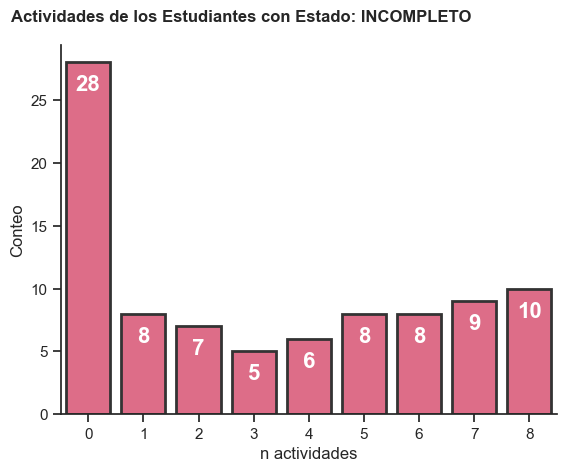

In [49]:
#| fig-align: center
ax = sns.countplot(
    df_clean.query('estado_actividades=="INCOMPLETO"'),
    x='n_actividades',
    color='#F05A7E',
    linewidth=2,
    edgecolor=".2",
)

# Agregar etiquetas justo debajo del borde superior
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:  # Para evitar errores si alguna barra es cero
        x = p.get_x() + p.get_width() / 2
        y = altura - 1  # Se ajusta el valor vertical
        ax.text(
            x, y, f'{int(altura)}',
            ha='center', va='top',
            color='white', fontweight='bold', fontsize=16
        )

plt.title("Actividades de los Estudiantes con Estado: INCOMPLETO", fontsize=12,loc="left", fontweight="bold", x=-0.1, y=1.04 )
plt.xlabel('n actividades')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)

* 28 estudiantes no realizaron ninguna actividad.

In [50]:
#| output: False
df_clean.query('estado_actividades=="INCOMPLETO"').n_actividades.value_counts()

0    28
8    10
7     9
1     8
6     8
5     8
2     7
4     6
3     5
Name: n_actividades, dtype: int64

In [51]:
# Distribución del número de activades de todos los estudiantes de mayo
df_clean.n_actividades.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
n_actividades,148.0,6.0,4.3063,0.0,1.75,7.0,9.0,19.0


* El 50 % de los estudiantes realizo 7 actividades o menos.
* Un 25 % de los estudiantes realizo igual o más de 9 actividades.
* Existe un estudiante que realizo 19 actividades.

***

In [52]:
import numpy as np
def continuidad(x):
    if 'CONGELAR' in x:
        return 'CONGELAR'
    if 'RETIRAR' in x:
        return 'RETIRAR'
    return x

:::: {.columns}

::: {.column width="30%"}

* El 57.4 % (85) de los estudiantes continuaran con el programa para el siguiente nivel.
* El 15 % (22) de los estudiantes ha decidido congelar el programa.
* El 17.6 % (26) no dieron información de su estado.
* Solo 2 personas se retiran del programa.

:::

::: {.column width="70%"}

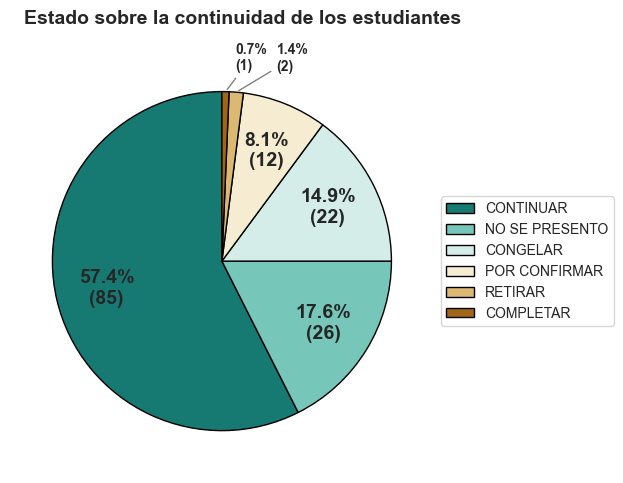

In [53]:
estado_counts = (
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .estado_continuidad
    .value_counts()
)

labels = estado_counts.index.tolist()
data = estado_counts.values.tolist()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

# Colores personalizados
colors = sns.color_palette("BrBG_r")

# Gráfico de torta SIN autopct
wedges, texts = ax.pie(
    data,
    textprops=dict(color="black", weight="bold"),
    colors=colors,
    startangle=90,
    wedgeprops=dict(linewidth=1, edgecolor='black')
)

# Se define la función para mostrar porcentaje y cantidad
def format_label(pct, total):
    absolute = int(np.round(pct / 100. * total))
    return f"{pct:.1f}%\n({absolute})"

# Total general
total = sum(data)

# Se posicionan manualmente las etiquetas
for i, (wedge, count) in enumerate(zip(wedges, data)):
    angle = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    ha = 'left' if x >= 0 else 'right'
    label = format_label(100 * count / total, total)

    if count < 5:
        # Se coloca el texto fuera con flecha
        ax.annotate(
            label,
            xy=(x, y),
            xytext=(3.8 * x, 1.2 * y),
            arrowprops=dict(arrowstyle='-', color='gray'),
            ha=ha, va='center', fontsize=10, fontweight='bold'
        )
    else:
        # Se coloca el texto dentro del segmento
        ax.text(
            0.7 * x,
            0.7 * y,
            label,
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold'
        )

# Leyenda externa
ax.legend(
    wedges,
    labels,
    title="",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
)

# Título
ax.set_title("Estado sobre la continuidad de los estudiantes", fontsize=14, fontweight="bold", x=0.55,y=1.04)

plt.tight_layout()
plt.show()

:::

::::

In [54]:
#| output: False
(
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .query('estado_continuidad == "CONGELAR"')
    .assign(motivo=lambda df: df['continuidad'].str.replace(r'^CONGELAR - ', '', regex=True))
).head()

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad,estado_continuidad,motivo
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,11,CONGELAR - TRABAJO,CONGELAR,TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,0,CONGELAR - TRABAJO,CONGELAR,TRABAJO
16,17,La Paz,75,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,12,CONGELAR - PREMILITAR,CONGELAR,PREMILITAR
41,42,La Paz,98,HELEN,BASICO,INTENSIVO,COMPLETO,19,CONGELAR - INTERNADO,CONGELAR,INTERNADO
44,45,Sucre,88,MARIA,PRINCIPIANTE,INTENSIVO,INCOMPLETO,2,CONGELAR - PRACTICAS,CONGELAR,PRACTICAS


***

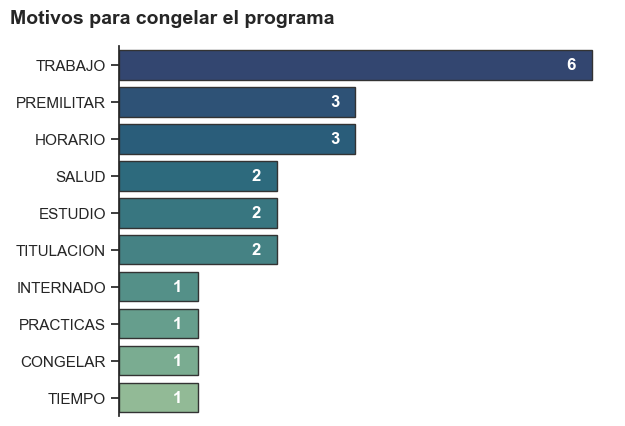

In [55]:
#| fig-align: center
df_congl = (
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .query('estado_continuidad == "CONGELAR"')
    .assign(motivo=lambda df: df['continuidad'].str.replace(r'^CONGELAR - ', '', regex=True))
)

# Se cuenta la frecuencia de cada categoría
orden = (
    df_congl['motivo']
    .astype(str)
    .value_counts()
    .index
)

# Se redefine la columna como categórica con orden explícito
df_congl = df_congl.assign(
    motivo=lambda df: pd.Categorical(df['motivo'].astype(str), categories=orden, ordered=True)
)

ax=sns.countplot(
    data=df_congl,
    y='motivo',
    hue='motivo',
    palette='crest_r',
    edgecolor=".2",
)

# Se agregan las etiquetas dentro de cada barra
for p in ax.patches:
    ancho = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.text(
        x=ancho - 0.2,  # Se posiciona a la izquierda del borde
        y=y_pos,
        s=int(ancho),
        va='center',
        ha='right',
        fontsize=12,
        fontweight='bold',
        color='white'
    )

# Ocultar eje X y bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

plt.title("Motivos para congelar el programa", fontsize=14,loc="left", fontweight="bold", x=-0.22, y=1.04 )
plt.ylabel('')
plt.xlabel('')
plt.show()

El motivo mas frecuente para congelar los cursos de idiomas es por Trabajo. Tambien existen casos particulares como los estudiantes del area de salud.

***

## Sugerencias

Obtener un conjuntos de datos con mayor informacion sobre las caracteristicas sociodemográficas de los estudiantes. Esto para comprender aun mejor los motivos para no continuar, congelar o retirarse del programa. Asi como tambien recabar información sobre todos los estudiantes de otras modalidades de estudio. Tambien se sugiere obtener datos sobre los alumnos reprobados para poder realizar mas comparaciones entre grupos.

